In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime as dt

from matplotlib.pyplot import rcParams

import datetime

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("weatherHistory1.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [4]:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [5]:
quantitative = df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
df.shape

(96453, 12)

In [8]:
pd_series = pd.Series(data = [pd.to_datetime(i) for i in df['Formatted Date']],index = df.index)

In [9]:
pd_year = pd.Series(data = [i.year for i in pd_series],index = df.index)
pd_date = pd.Series(data = [i.date() for i in pd_series],index = df.index)
pd_month = pd.Series(data = [i.month for i in pd_series],index = df.index)
pd_day = pd.Series(data = [i.day for i in pd_series],index = df.index)
pd_hour = pd.Series(data = [i.hour for i in pd_series],index = df.index)
df['date'] = pd_date
df['year'] = pd_year
df['month'] = pd_month
df['day'] = pd_day
df['hour'] = pd_hour

In [10]:
df = df.drop(columns = ['Formatted Date'])
# df.info()
# print(pd_series[0].time())

In [11]:
df.head()
# len(df["Summary"].unique())

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,year,month,day,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,2006,4,1,0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,2006,4,1,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,2006,4,1,2
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,2006,4,1,3
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,2006,4,1,4


In [12]:
df["Daily Summary"].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [13]:
def change_category(Summary):
    if Summary=='Partly Cloudy':
        return 1
    elif Summary=='Mostly Cloudy':
        return 2
    elif Summary=='Foggy':
        return 3
    elif Summary=='Clear':
        return 4
    elif Summary=='Overcast':
        return 5
    elif Summary=='Breezy and Overcast':
        return 6
    elif Summary=='Breezy and Partly Cloudy':
        return 7
    elif Summary=='Breezy and Mostly Cloudy':
        return 8
    elif Summary=='Dry and Partly Cloudy':
        return 9
    elif Summary=='Windy and Partly Cloudy':
        return 10
    elif Summary=='Light Rain':
        return 11
    elif Summary=='Breezy':
        return 12
    elif Summary=='Windy and Overcast':
        return 13
    elif Summary=='Humid and Mostly Cloudy':
        return 14
    elif Summary=='Drizzle':
        return 15
    elif Summary=='Windy and Mostly Cloudy':
        return 16
    elif Summary=='Breezy and Foggy':
        return 17
    elif Summary=='Dry':
        return 18
    elif Summary=='Humid and Partly Cloudy':
        return 19
    elif Summary=='Dry and Mostly Cloudy':
        return 20
    elif Summary=='Rain':
        return 21
    elif Summary=='Windy':
        return 22
    elif Summary=='Humid and Overcast':
        return 23
    elif Summary=='Windy and Foggy':
        return 24
    elif Summary=='Dangerously Windy and Partly Cloudy':
        return 25
    elif Summary=='Windy and Dry':
        return 26
    elif Summary=='Breezy and Dry':
        return 27

In [14]:
df['SummaryCat'] = df['Summary'].apply(change_category)

In [15]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,year,month,day,hour,SummaryCat
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,2006,4,1,0,1
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,2006,4,1,1,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,2006,4,1,2,2
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,2006,4,1,3,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,2006,4,1,4,2


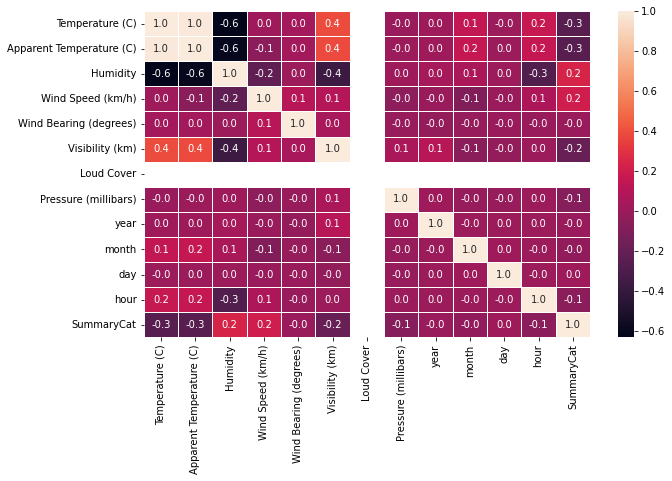

In [16]:
# corr_df = df.iloc[:, 1:].corr()
# plt.figure(figsize = (10, 6), dpi = 96)
# sns.heatmap(data = corr_df, annot = True) # 'annot=True' fills the R values in the heatmap cells.
# plt.show()
f,ax = plt.subplots(figsize=(10 ,6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [17]:
df[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Loud Cover'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

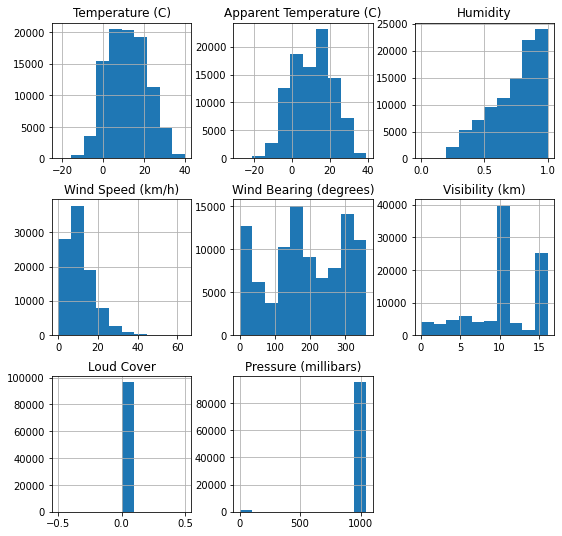

In [18]:
rcParams['figure.figsize'] = 9, 9
df[quantitative].hist()

In [19]:
df = df.drop('Loud Cover',axis=1)

<AxesSubplot:>

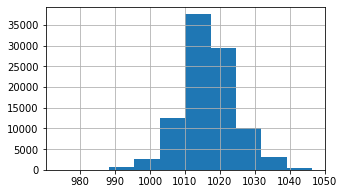

In [20]:
pressure_median = df['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
df["Pressure (millibars)"] = df.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
df['Pressure (millibars)'].hist()

<AxesSubplot:xlabel='count', ylabel='SummaryCat'>

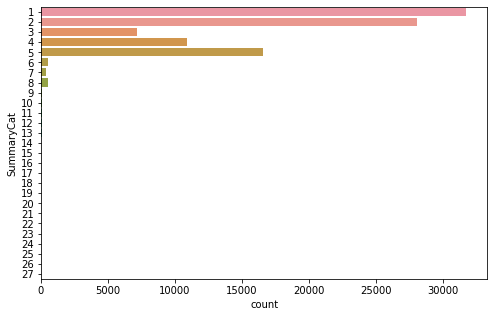

In [21]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=df['SummaryCat'])

In [22]:
total_cell = np.product(df.shape)
missing_count = df.isnull().sum()
total_missing = missing_count.sum()
print(round((total_missing / total_cell) * 100),2)

0 2


In [23]:
df['SummaryCat'].value_counts()

1     31733
2     28094
5     16597
4     10890
3      7148
6       528
8       516
7       386
9        86
10       67
11       63
12       54
13       45
14       40
15       39
17       35
16       35
18       34
19       17
20       14
21       10
22        8
23        7
24        4
26        1
25        1
27        1
Name: SummaryCat, dtype: int64

In [24]:
d = {1:'Partly Cloudy',2:'Mostly Cloudy',3:'Foggy',4:'Clear',5:'Overcast',6:'Breezy and Overcast',7:'Breezy and Partly Cloudy',
    8:'Breezy and Mostly Cloudy',9:'Dry and Partly Cloudy',10:'Windy and Partly Cloudy',11:'Light Rain',12:'Breezy',
    13:'Windy and Overcast',14:'Humid and Mostly Cloudy',15:'Drizzle',16:'Windy and Mostly Cloudy',17:'Breezy and Foggy',
    18:'Dry',19:'Humid and Partly Cloudy',20:'Dry and Mostly Cloudy',21:'Rain',22:'Windy',23:'Humid and Overcast',
    24:'Windy and Foggy',25:'Dangerously Windy and Partly Cloudy',26:'Windy and Dry',27:'Breezy and Dry'}

In [25]:
def change_category1(Summary):
    if Summary=='Partly Cloudy':
        return 1
    elif Summary=='Mostly Cloudy':
        return 2
    elif Summary=='Foggy':
        return 3
    elif Summary=='Clear':
        return 4
    elif Summary=='Overcast':
        return 5
    elif Summary=='Breezy and Overcast' or 'Breezy and Mostly Cloudy' or 'Breezy and Partly Cloudy' or 'Breezy' or 'Breezy and Dry' or 'Breezy and Foggy':
        return 6
    elif Summary=='Dry and Partly Cloudy' or 'Dry' or 'Dry and Mostly Cloudy':
        return 7
    elif Summary=='Windy and Partly Cloudy' or 'Dangerously Windy and Partly Cloudy' or 'Windy and Overcast' or 'Windy and Mostly Cloudy' or 'Windy' or 'Windy and Foggy' or 'Windy and Dry':
        return 8
    elif Summary=='Light Rain' or 'Drizzle' or 'Rain':
        return 9
    elif Summary=='Humid and Mostly Cloudy' or 'Humid and Overcast' or 'Humid and Partly Cloudy':
        return 10


In [26]:
df['SummaryCat2'] = df['Summary'].apply(change_category1)

In [27]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,date,year,month,day,hour,SummaryCat,SummaryCat2
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-04-01,2006,4,1,0,1,1
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-04-01,2006,4,1,1,1,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01,2006,4,1,2,2,2
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01,2006,4,1,3,1,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01,2006,4,1,4,2,2


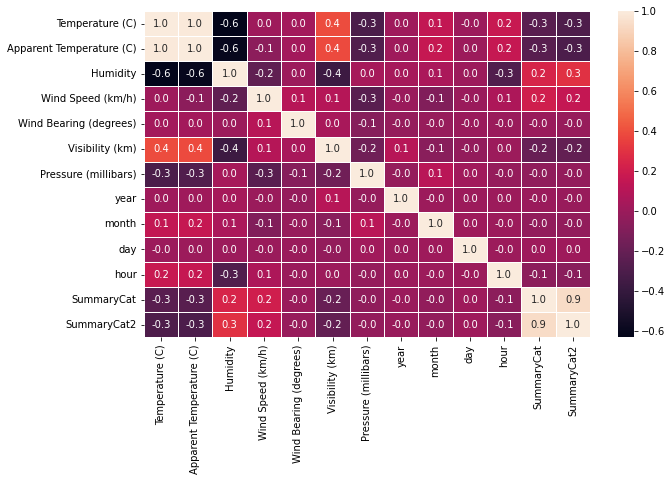

In [28]:
f,ax = plt.subplots(figsize=(10 ,6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

plt.show()

<AxesSubplot:xlabel='count', ylabel='SummaryCat2'>

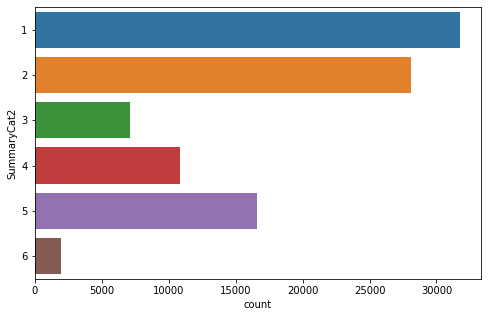

In [29]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=df['SummaryCat2'])

In [30]:
df['SummaryCat2'].value_counts()

1    31733
2    28094
5    16597
4    10890
3     7148
6     1991
Name: SummaryCat2, dtype: int64

In [31]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary', 'date',
       'year', 'month', 'day', 'hour', 'SummaryCat', 'SummaryCat2'],
      dtype='object')

In [49]:
from sklearn.metrics import accuracy_score
lr = linear_model.LinearRegression()
x_f = ['Temperature (C)','Humidity','Wind Speed (km/h)']
x = df[x_f]
y = df['SummaryCat']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,shuffle=True, random_state=0)

print("Linear Regression")
lr.fit(X_train, y_train)
print("\n\nCalculating some regression quality metrics")
y_pred = lr.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))
# accuracy_score(y_test, y_pred)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
accuracy_score(y_test, y_pred1)

Linear Regression


Calculating some regression quality metrics
MSE =  2.3553086062693054
R2 =  0.10599278000997048


0.4225777143227984

In [45]:
lr1 = linear_model.LinearRegression()
x_f = ['Temperature (C)','Humidity','Wind Speed (km/h)']
x = df[x_f]
y = df['SummaryCat2']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,shuffle=True, random_state=0)

print("Linear Regression")
lr1.fit(X_train, y_train)
print("\n\nCalculating some regression quality metrics")
y_pred = lr1.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))
model = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
accuracy_score(y_test, y_pred1)

Linear Regression


Calculating some regression quality metrics
MSE =  1.9546474510140452
R2 =  0.13002112658714005


0.4237458628074502

In [52]:
lr2 = linear_model.LinearRegression()
x_f = ['Humidity','Wind Speed (km/h)']
x = df[x_f]
y = df['SummaryCat2']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,shuffle=True, random_state=0)

print("Linear Regression")
lr2.fit(X_train, y_train)
print("\n\nCalculating some regression quality metrics")
y_pred = lr2.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))
model = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
accuracy_score(y_test, y_pred1)

Linear Regression


Calculating some regression quality metrics
MSE =  1.9854880479646397
R2 =  0.11629452449501398


0.35647997923291586

In [55]:
lr3 = linear_model.LinearRegression()
x_f = ['Humidity','Wind Speed (km/h)']
x = df[x_f]
y = df['SummaryCat']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,shuffle=True, random_state=42)

print("Linear Regression")
lr3.fit(X_train, y_train) 
print("\n\nCalculating some regression quality metrics")
y_pred = lr3.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))
model = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
accuracy_score(y_test, y_pred1)

Linear Regression


Calculating some regression quality metrics
MSE =  2.391525014009368
R2 =  0.09093363102692265


0.35394899084950354

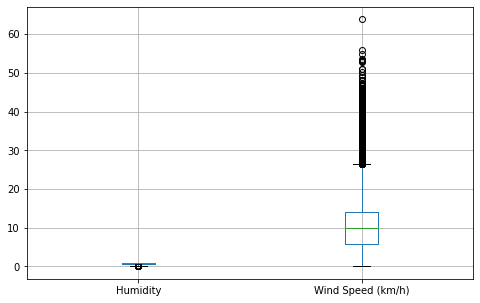

In [39]:
boxplot = df.boxplot(column=x_f)

In [40]:
Q1 = np.percentile(df['Wind Speed (km/h)'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Wind Speed (km/h)'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['Wind Speed (km/h)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Wind Speed (km/h)'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

Old Shape:  (96453, 17)
New Shape:  (93425, 17)


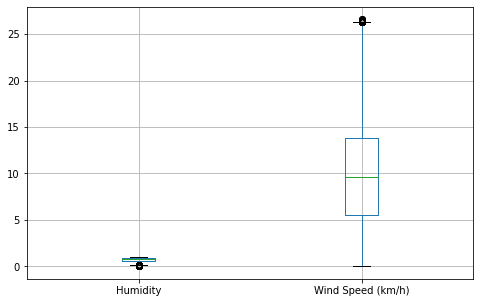

In [41]:
boxplot = df.boxplot(column=x_f)

In [42]:
Q11 = np.percentile(df['Temperature (C)'], 25,
                   interpolation = 'midpoint')
 
Q33 = np.percentile(df['Temperature (C)'], 75,
                   interpolation = 'midpoint')
IQR1 = Q33 - Q11

print("Old Shape: ", df.shape)

# Upper bound
upper1 = np.where(df['Temperature (C)'] >= (Q33+1.5*IQR1))
# Lower bound
lower1 = np.where(df['Temperature (C)'] <= (Q11-1.5*IQR1))

''' Removing the Outliers '''
df.drop(upper1[0], inplace = True)
df.drop(lower1[0], inplace = True)

print("New Shape: ", df.shape)

Old Shape:  (93425, 17)
New Shape:  (93386, 17)


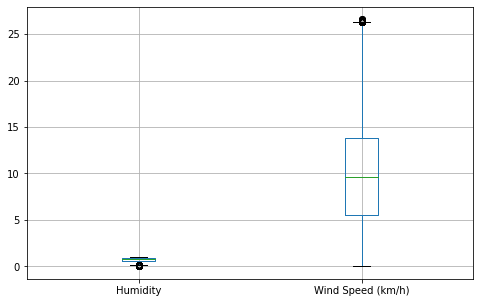

In [43]:
boxplot = df.boxplot(column=x_f)

In [48]:
from sklearn.naive_bayes import GaussianNB


In [56]:
classifier = GaussianNB()
classifier.fit(x,y)


GaussianNB()

In [57]:
classifier.score(x,y)


0.4090441822114664